In [1]:
import pandas as pd

# Load the dataset
file_path = "DrugReview_New.csv"  # Replace with the correct file path
drug_reviews = pd.read_csv(file_path, encoding="latin1")

# List of numerical columns to check
numerical_columns = ["EaseofUse", "Effectiveness", "Satisfaction", "UsefulCount"]

# Function to clean non-numeric values
def clean_numerical_columns(df, columns):
    for col in columns:
        # Coerce non-numeric values to NaN
        df[col] = pd.to_numeric(df[col], errors="coerce")
        # Replace NaN values with the column mean
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Clean numerical columns
drug_reviews_cleaned = clean_numerical_columns(drug_reviews, numerical_columns)

# Save the cleaned dataset
cleaned_file_path = "Cleaned_DrugReview.csv"  # Replace with the desired output path
drug_reviews_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: Cleaned_DrugReview.csv


C:\Users\user\AppData\Local\Temp\ipykernel_296\1934681013.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Summary Statistics:
         EaseofUse  Effectiveness  Satisfaction  SidesEffects  UsefulCount  \
count  1952.000000    1952.000000   1952.000000           0.0  1952.000000   
mean      4.024090       3.445478      2.798565           NaN     6.592517   
std       1.257243       1.335552      1.541471           NaN     6.527828   
min       1.000000       1.000000      1.000000           NaN     0.000000   
25%       3.000000       3.000000      1.000000           NaN     2.000000   
50%       4.000000       4.000000      3.000000           NaN     5.000000   
75%       5.000000       5.000000      4.000000           NaN    10.000000   
max       5.000000       5.000000      5.000000           NaN    70.000000   

       Unnamed: 11  Sentiment  Topic Discussion  
count          0.0        0.0               0.0  
mean           NaN        NaN               NaN  
std            NaN        NaN               NaN  
min            NaN        NaN               NaN  
25%            NaN        N

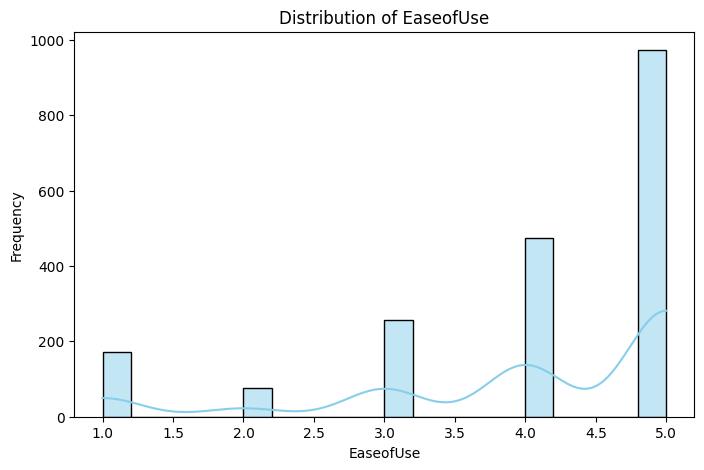

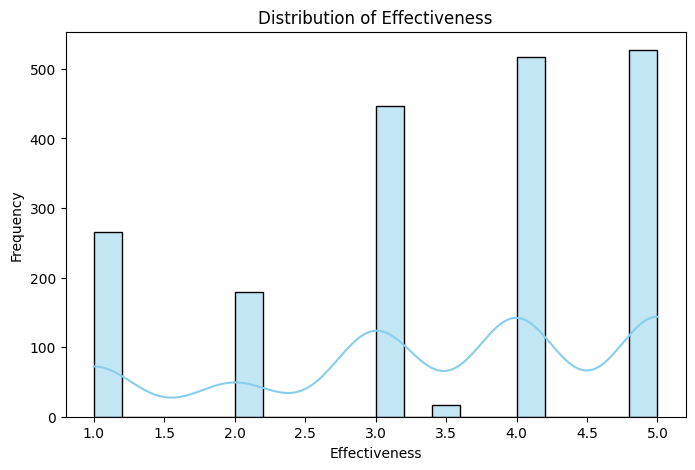

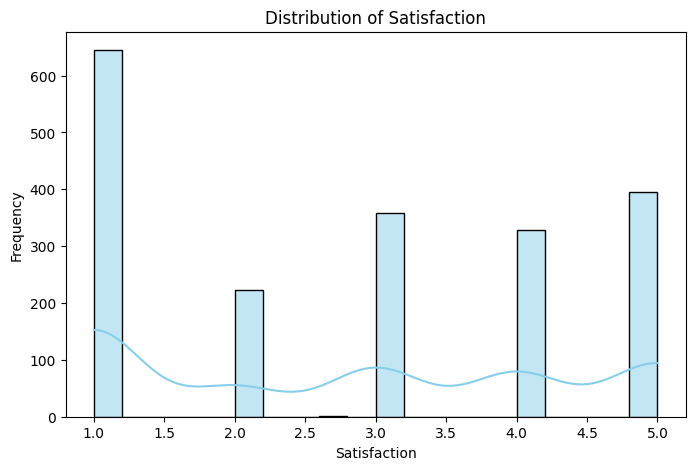

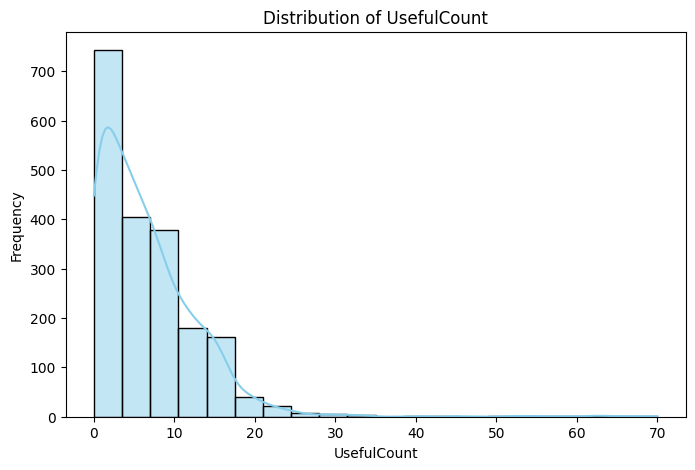

C:\Users\user\AppData\Local\Temp\ipykernel_296\1019467546.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age", data=data, palette="viridis", order=data["Age"].value_counts().index)


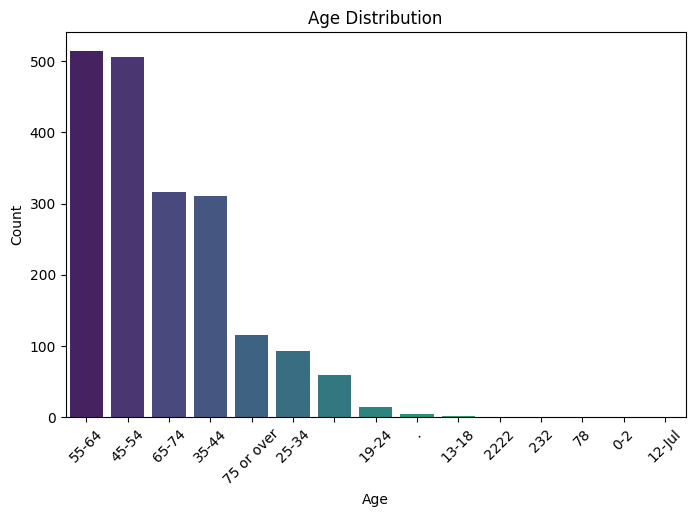

C:\Users\user\AppData\Local\Temp\ipykernel_296\1019467546.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=data, palette="pastel")


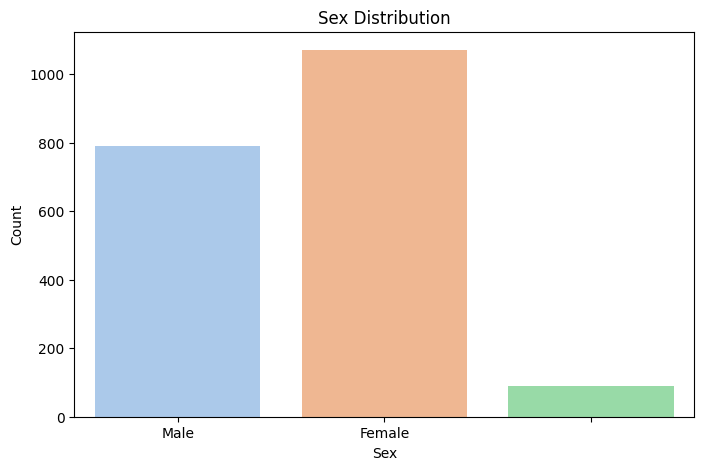

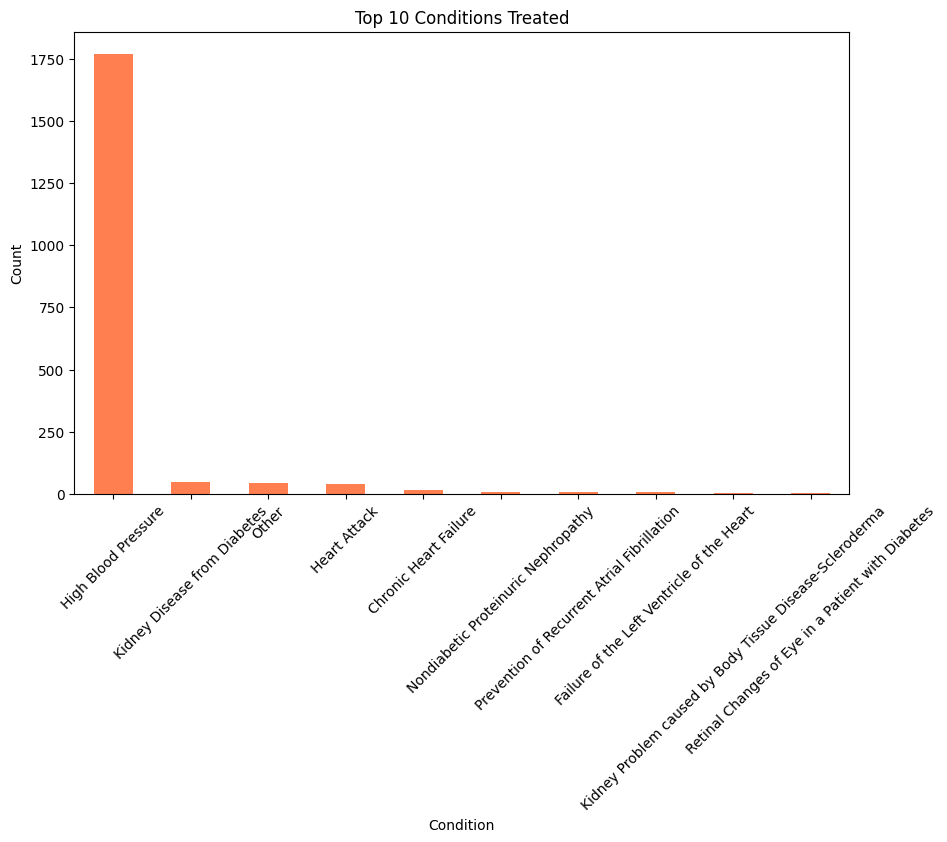

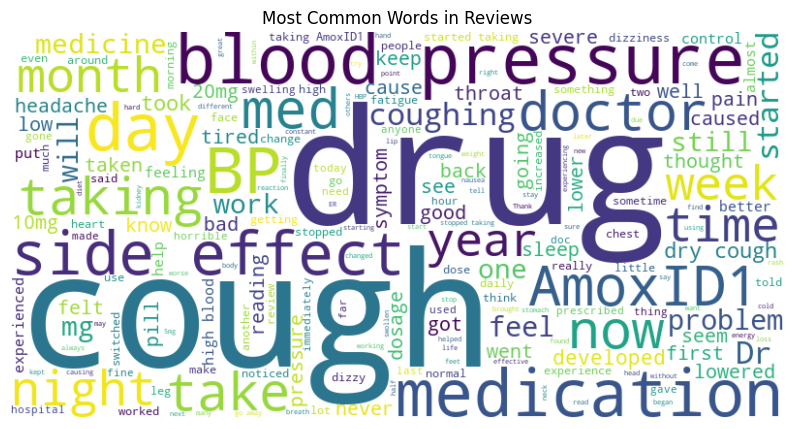

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the cleaned dataset
file_path = "Cleaned_DrugReview.csv"  # Replace with your cleaned file path
data = pd.read_csv(file_path)

# Summary Statistics
print("Summary Statistics:")
print(data.describe())

# Plot distribution for numerical columns
numerical_columns = ["EaseofUse", "Effectiveness", "Satisfaction", "UsefulCount"]
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Plot distribution for Age and Sex
plt.figure(figsize=(8, 5))
sns.countplot(x="Age", data=data, palette="viridis", order=data["Age"].value_counts().index)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x="Sex", data=data, palette="pastel")
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Plot bar chart for 'Usedfor'
plt.figure(figsize=(10, 6))
data["Usedfor"].value_counts().head(10).plot(kind="bar", color="coral")
plt.title("Top 10 Conditions Treated")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Word Cloud for Reviews
text = " ".join(review for review in data["Reviews"] if isinstance(review, str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


Sentiment analysis complete! Results saved to: Sentiment_Analysis_DrugReview.csv


C:\Users\user\AppData\Local\Temp\ipykernel_296\2371152631.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=data, palette="coolwarm")


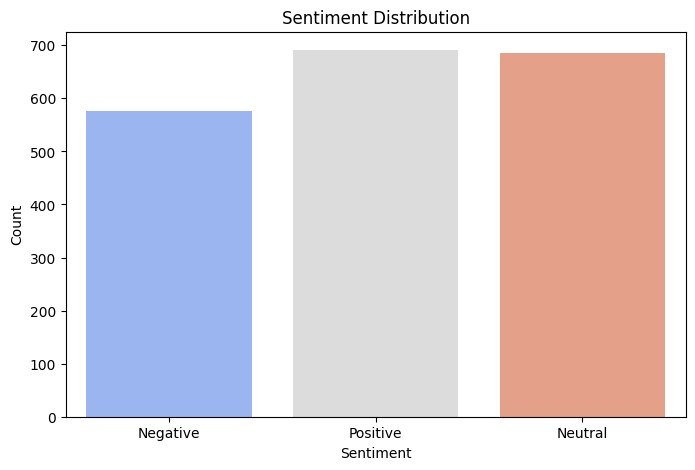

In [3]:
from textblob import TextBlob
import pandas as pd

# Load the cleaned dataset
file_path = "Cleaned_DrugReview.csv"  # Replace with your cleaned file path
data = pd.read_csv(file_path)

# Function to analyze sentiment
def get_sentiment(text):
    if isinstance(text, str):  # Ensure the review is a string
        analysis = TextBlob(text)
        # Determine polarity
        if analysis.sentiment.polarity > 0:
            return "Positive"
        elif analysis.sentiment.polarity == 0:
            return "Neutral"
        else:
            return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
data["Sentiment"] = data["Reviews"].apply(get_sentiment)

# Save the dataset with sentiment column
output_file_path = "Sentiment_Analysis_DrugReview.csv"  # Replace with your desired output path
data.to_csv(output_file_path, index=False)

print(f"Sentiment analysis complete! Results saved to: {output_file_path}")

# Visualize sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x="Sentiment", data=data, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top words per topic:
Topic #1:
bp cough day night med coughing taking mg dry dr


Topic #2:
blood pressure taking medication high amoxid1 drug effects bp years


Topic #3:
cough medication amoxid1 doctor taking effects mg started medicine went


Topic #4:
cough medication dry feel night like sleep drug bad tired


Topic #5:
drug taking days pain took reaction doctor time med went




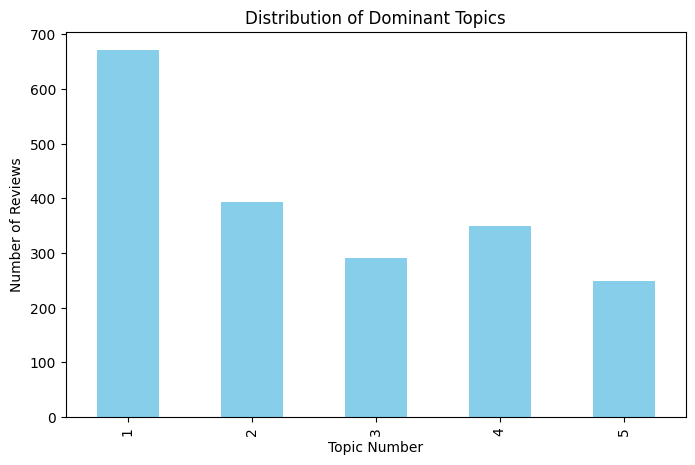

Topic modeling complete! Results saved to: Topic_Modeling_DrugReview.csv


In [5]:
import nltk
nltk.download()

# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load the cleaned dataset with sentiment column
file_path = "Sentiment_Analysis_DrugReview.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the Reviews for Topic Modeling
def preprocess_reviews(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(tokens)
    return ''

# Handle missing values in 'Reviews' column
data['Reviews'] = data['Reviews'].fillna('')

# Apply preprocessing
data['Cleaned_Reviews'] = data['Reviews'].apply(preprocess_reviews)

# Convert text data into a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(data['Cleaned_Reviews'])

# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Extract 5 topics
lda_model.fit(dtm)

# Display the top words in each topic
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))
        print("\n")

print("Top words per topic:")
display_topics(lda_model, vectorizer.get_feature_names_out())

# Visualize topic distribution
topic_distribution = lda_model.transform(dtm)
data['Dominant_Topic'] = topic_distribution.argmax(axis=1) + 1  # Topics are 1-indexed

plt.figure(figsize=(8, 5))
data['Dominant_Topic'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of Dominant Topics")
plt.xlabel("Topic Number")
plt.ylabel("Number of Reviews")
plt.show()

# Save the dataset with dominant topic column
output_file_path = "Topic_Modeling_DrugReview.csv"  # Replace with desired output path
data.to_csv(output_file_path, index=False)
print(f"Topic modeling complete! Results saved to: {output_file_path}")

Found NaN values in Cleaned_Reviews. Filling with empty strings.
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.41      0.45       201
           1       0.47      0.56      0.51       190

    accuracy                           0.48       391
   macro avg       0.49      0.49      0.48       391
weighted avg       0.49      0.48      0.48       391



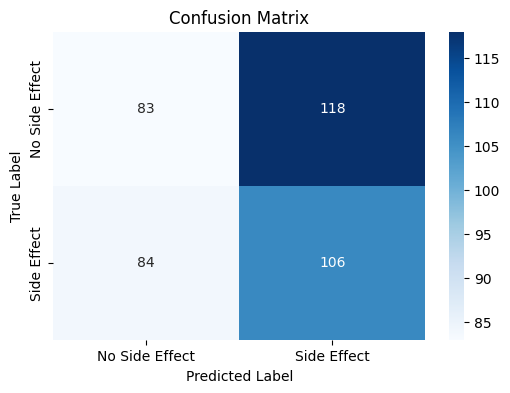

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with Cleaned_Reviews
file_path = "Topic_Modeling_DrugReview.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Check for NaN values in Cleaned_Reviews
if data['Cleaned_Reviews'].isnull().sum() > 0:
    print("Found NaN values in Cleaned_Reviews. Filling with empty strings.")
    data['Cleaned_Reviews'] = data['Cleaned_Reviews'].fillna('')

# Generate dummy labels for side effects (replace with real labels if available)
np.random.seed(42)
data['Side_Effect_Label'] = np.random.choice([0, 1], size=len(data))  # 1: Side effect, 0: No side effect

# Preprocess text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X = vectorizer.fit_transform(data['Cleaned_Reviews'])

# Define labels
y = data['Side_Effect_Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Side Effect', 'Side Effect'], yticklabels=['No Side Effect', 'Side Effect'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [7]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "Topic_Modeling_DrugReview.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Add random dummy labels for Side Effect (1 = Side Effect, 0 = No Side Effect)
np.random.seed(42)
data['Side_Effect_Label'] = np.random.choice([0, 1], size=len(data))

# Save the updated dataset
updated_file_path = "Updated_DrugReview.csv"  # Replace with your desired output path
data.to_csv(updated_file_path, index=False)

print(f"Dataset updated with 'Side_Effect_Label'. Saved to: {updated_file_path}")


Dataset updated with 'Side_Effect_Label'. Saved to: Updated_DrugReview.csv
